# Superset 1000 imb results

Output files location: `gentime-attraction/scripts/`

Current outputted files (.tsv): `results-imb-Ne-1000`, `results-imb-Ne-100000`, `results-imb-gt-1000`, `results-imb-gt-100000`

Output file format:
1. "nloci" = given param
2. "nsites" = given param
3. "rep" = counter
4. "concat_tree_raxml" = gene tree newick -> CLOUD TREE
5. "prop_genealogies_concordant" = true genealogy prop concordant -> REPORT # WITH CLOUD TREE
6. "prop_raxtrees_concordant" = gene tree prop concordant -> REPORT # WITH CLOUD TREE
7. "nsnps_per_locus" = #
8. "mean_unique_topologies_per_locus" = #
9. "n_unique_inferred_topologies"= #
10. "astral_tree_genealogies" = true genealogy -> infer species tree newick -> CLOUD TREE
11. "dist_astral_tree_genealogies" = true genealogy -> infer species tree vs. original species tree dist -> USE COLORS ON CLOUD TREE
12. "astral_tree_raxtrees" = gene tree -> infer species tree newick -> CLOUD TREE
13. "dist_astral_tree_raxtrees" = gene tree -> infer species tree vs. original species tree dist -> USE COLORS ON CLOUD TREE
14. "snaq_net1_genealogies" = true genealogy -> network -> PLOT NETWORKS
15. "snaq_net1_genealogies_loglik_diff" = true genealogy -> network snaq loglik diff -> PLOT HISTOGRAM
16. "snaq_net1_raxtrees" = gene tree -> network -> PLOT NETWORKS
17. "snaq_net1_raxtrees_loglik_diff" = gene tree -> network snaq loglik diff -> PLOT HISTOGRAM

## Load data

In [1]:
import toytree
import pandas as pd
import numpy as np
import ipcoal
import toyplot
import toyplot.svg, toyplot.color

In [2]:
# get an ultrametric imbalanced tree
IMBTREE = toytree.rtree.imbtree(8, treeheight=1e6)
EDGES = [3, 4, 10, 11]
# EDGES = [0, 1, 2, 6, 7, 8, 9, 13, 14]
NE_DEFAULT = 5e5
GT_DEFAULT = 1
RNG = np.random.default_rng(123)
NLOCI = 10_000
NAME_ORDER = sorted(IMBTREE.get_tip_labels())[::-1]
NAME_ORDER 

['r7', 'r6', 'r5', 'r4', 'r3', 'r2', 'r1', 'r0']

In [3]:
# set parameters on the species tree
imbtree_ne = IMBTREE.copy()
imbtree_ne = imbtree_ne.set_node_data("Ne", {i: NE_DEFAULT * 20 for i in EDGES}, default=NE_DEFAULT)
imbtree_ne = imbtree_ne.set_node_data("gt", default=GT_DEFAULT)
imbtree_ne = imbtree_ne.set_node_data("tg", {i: i.dist / i.gt for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tc", {i: i.tg / (2 * i.Ne) for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("theta", {i: 4 * i.Ne * 1e-8 for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("rho", {i: 4 * i.Ne * 1e-9 for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tg_rho", {i: i.tg * i.rho for i in imbtree_ne})
imbtree_ne = imbtree_ne.set_node_data("tg_theta", {i: i.tg * i.theta * 1e-9 for i in imbtree_ne})

# convert edge lens to units of generations.
imbtree_ne = imbtree_ne.set_node_data("dist", {i: i.tg for i in imbtree_ne})

# show data
imbtree_ne.get_node_data()

idx name        height          dist  support          Ne  gt    rho  \
0     0   r0  1.164153e-10  1.428571e+05      NaN    500000.0   1  0.002   
1     1   r1  1.164153e-10  1.428571e+05      NaN    500000.0   1  0.002   
2     2   r2  1.164153e-10  2.857143e+05      NaN    500000.0   1  0.002   
3     3   r3  0.000000e+00  4.285714e+05      NaN  10000000.0   1  0.040   
4     4   r4  0.000000e+00  5.714286e+05      NaN  10000000.0   1  0.040   
5     5   r5  1.164153e-10  7.142857e+05      NaN    500000.0   1  0.002   
6     6   r6  0.000000e+00  8.571429e+05      NaN    500000.0   1  0.002   
7     7   r7  0.000000e+00  1.000000e+06      NaN    500000.0   1  0.002   
8     8       1.428571e+05  1.428571e+05      NaN    500000.0   1  0.002   
9     9       2.857143e+05  1.428571e+05      NaN    500000.0   1  0.002   
10   10       4.285714e+05  1.428571e+05      NaN  10000000.0   1  0.040   
11   11       5.714286e+05  1.428571e+05      NaN  10000000.0   1  0.040   
12   12       7.142857e+05  1.428571e+05      NaN    500000.0   1  0.002   
13   13       8.571429e+05  1.428571e+05      NaN    500000.0   1  0.002   
14   14       1.000000e+06  0.000000e+00      NaN    500000.0   1  0.002   

          tc            tg        tg_rho  tg_theta  theta  
0   0.142857  1.428571e+05    285.714286  0.000003   0.02  
1   0.142857  1.428571e+05    285.714286  0.000003   0.02  
2   0.285714  2.857143e+05    571.428571  0.000006   0.02  
3   0.021429  4.285714e+05  17142.857143  0.000171   0.40  
4   0.028571  5.714286e+05  22857.142857  0.000229   0.40  
5   0.714286  7.142857e+05   1428.571429  0.000014   0.02  
6   0.857143  8.571429e+05   1714.285714  0.000017   0.02  
7   1.000000  1.000000e+06   2000.000000  0.000020   0.02  
8   0.142857  1.428571e+05    285.714286  0.000003   0.02  
9   0.142857  1.428571e+05    285.714286  0.000003   0.02  
10  0.007143  1.428571e+05   5714.285714  0.000057   0.40  
11  0.007143  1.428571e+05   5714.285714  0.000057   0.40  
12  0.142857  1.428571e+05    285.714286  0.000003   0.02  
13  0.142857  1.428571e+05    285.714286  0.000003   0.02  
14  0.000000  0.000000e+00      0.000000  0.000000   0.02

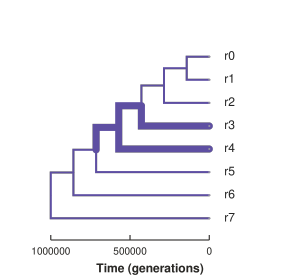

In [4]:
# draw tree figure and save it
kwargs = dict(
    scale_bar=True, tip_labels_align=True, 
    edge_widths=("Ne", 2, 7), edge_colors="gt", fixed_order=NAME_ORDER
)
c, a, m = imbtree_ne.ladderize().draw(**kwargs)
a.x.label.text = "Time (generations)"
toyplot.svg.render(c, "./nb13_output/tree-imb-ne-gunits.svg")
c

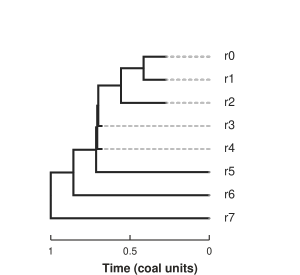

In [5]:
# draw tree w/ edge lengths in coal units
kwargs = dict(scale_bar=True, tip_labels_align=True, fixed_order=NAME_ORDER)
c, a, m = imbtree_ne.set_node_data("dist", {i: i.tc for i in imbtree_ne}).ladderize().draw(**kwargs);
a.x.label.text = "Time (coal units)"
toyplot.svg.render(c, "./nb13_output/tree-imb-ne-cunits.svg")
c

In [6]:
imbtree_gt = IMBTREE.copy()
imbtree_gt = imbtree_gt.set_node_data("Ne", default=NE_DEFAULT)
imbtree_gt = imbtree_gt.set_node_data("gt", {i: GT_DEFAULT * 20 for i in EDGES}, default=GT_DEFAULT)
imbtree_gt = imbtree_gt.set_node_data("tg", {i: i.dist / i.gt for i in imbtree_gt})
imbtree_gt = imbtree_gt.set_node_data("tc", {i: i.tg / (2 * i.Ne) for i in imbtree_gt})
imbtree_gt = imbtree_gt.set_node_data("theta", {i: 4 * i.Ne * 1e-8 for i in imbtree_gt})
imbtree_gt = imbtree_gt.set_node_data("rho", {i: 4 * i.Ne * 1e-9 for i in imbtree_gt})
imbtree_gt = imbtree_gt.set_node_data("tg_rho", {i: i.tg * i.rho for i in imbtree_gt})
imbtree_gt = imbtree_gt.set_node_data("tg_theta", {i: i.tg * i.theta * 1e-9 for i in imbtree_gt})

# convert dist to units of generations. Draw and show data
imbtree_gt = imbtree_gt.set_node_data("dist", {i: i.tg for i in imbtree_gt})
imbtree_gt.get_node_data()

idx name        height          dist  support        Ne  gt    rho  \
0     0   r0  2.714286e+05  1.428571e+05      NaN  500000.0   1  0.002   
1     1   r1  2.714286e+05  1.428571e+05      NaN  500000.0   1  0.002   
2     2   r2  2.714286e+05  2.857143e+05      NaN  500000.0   1  0.002   
3     3   r3  6.785714e+05  2.142857e+04      NaN  500000.0  20  0.002   
4     4   r4  6.785714e+05  2.857143e+04      NaN  500000.0  20  0.002   
5     5   r5  1.164153e-10  7.142857e+05      NaN  500000.0   1  0.002   
6     6   r6  0.000000e+00  8.571429e+05      NaN  500000.0   1  0.002   
7     7   r7  0.000000e+00  1.000000e+06      NaN  500000.0   1  0.002   
8     8       4.142857e+05  1.428571e+05      NaN  500000.0   1  0.002   
9     9       5.571429e+05  1.428571e+05      NaN  500000.0   1  0.002   
10   10       7.000000e+05  7.142857e+03      NaN  500000.0  20  0.002   
11   11       7.071429e+05  7.142857e+03      NaN  500000.0  20  0.002   
12   12       7.142857e+05  1.428571e+05      NaN  500000.0   1  0.002   
13   13       8.571429e+05  1.428571e+05      NaN  500000.0   1  0.002   
14   14       1.000000e+06  0.000000e+00      NaN  500000.0   1  0.002   

          tc            tg       tg_rho      tg_theta  theta  
0   0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
1   0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
2   0.285714  2.857143e+05   571.428571  5.714286e-06   0.02  
3   0.021429  2.142857e+04    42.857143  4.285714e-07   0.02  
4   0.028571  2.857143e+04    57.142857  5.714286e-07   0.02  
5   0.714286  7.142857e+05  1428.571429  1.428571e-05   0.02  
6   0.857143  8.571429e+05  1714.285714  1.714286e-05   0.02  
7   1.000000  1.000000e+06  2000.000000  2.000000e-05   0.02  
8   0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
9   0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
10  0.007143  7.142857e+03    14.285714  1.428571e-07   0.02  
11  0.007143  7.142857e+03    14.285714  1.428571e-07   0.02  
12  0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
13  0.142857  1.428571e+05   285.714286  2.857143e-06   0.02  
14  0.000000  0.000000e+00     0.000000  0.000000e+00   0.02

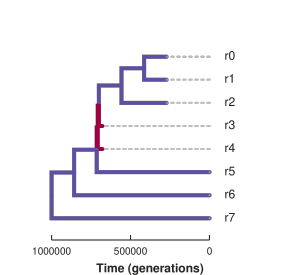

In [7]:
# draw tree figure and save it
kwargs = dict(
    scale_bar=True, tip_labels_align=True, 
    edge_widths=("Ne", 2, 4), edge_colors="gt",
    fixed_order=NAME_ORDER
)
c, a, m = imbtree_gt.ladderize().draw(**kwargs);
a.x.label.text = "Time (generations)"
toyplot.svg.render(c, "./nb13_output/tree-imb-gt-gunits.svg")
c

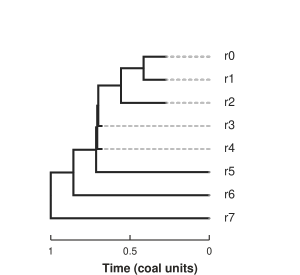

In [8]:
# draw tree w/ edge lengths in coal units
kwargs = dict(scale_bar=True, tip_labels_align=True, fixed_order=NAME_ORDER)
c, a, m = imbtree_gt.set_node_data("dist", {i: i.tc for i in imbtree_gt}).ladderize().draw(**kwargs);
a.x.label.text = "Time (coal units)"
toyplot.svg.render(c, "./nb13_output/tree-imb-gt-cunits.svg")
c

In [9]:
# import tsv supersets
tsv_header = ["nloci",
        "nsites",
        "rep",
        "concat_tree_raxml",
        "prop_genealogies_concordant",
        "prop_raxtrees_concordant",
        "nsnps_per_locus",
        "mean_unique_topologies_per_locus",
        "n_unique_inferred_topologies",
        "astral_tree_genealogies",
        "dist_astral_tree_genealogies",
        "astral_tree_raxtrees",
        "dist_astral_tree_raxtrees",
        "snaq_net1_genealogies",
        "snaq_net1_genealogies_loglik_diff",
        "snaq_net1_raxtrees",
        "snaq_net1_raxtrees_loglik_diff"]

# gt 1000 has NaN outputs
superset_imb_gt_1000_all = pd.read_csv('/home/scarlet/scratch/gentime-attraction/scripts/results-imb-gt-1000/superset-imb-gt-1000.tsv', sep='\t', names=tsv_header)
superset_imb_gt_1000 = superset_imb_gt_1000_all.dropna()
superset_imb_gt_100000 = pd.read_csv('/home/scarlet/scratch/gentime-attraction/scripts/results-imb-gt-100000/superset-imb-gt-100000.tsv',sep='\t', names=tsv_header)

superset_imb_Ne_1000 = pd.read_csv('/home/scarlet/scratch/gentime-attraction/scripts/results-imb-Ne-1000/superset-imb-Ne-1000.tsv', sep='\t', names=tsv_header)
superset_imb_Ne_100000 = pd.read_csv('/home/scarlet/scratch/gentime-attraction/scripts/results-imb-Ne-100000/superset-imb-Ne-100000.tsv', sep='\t', names=tsv_header)

In [10]:
# gt 1000 has NaN outputs
superset_imb_gt_1000.iloc[203]

nloci                                                    10000.0
nsites                                                    1000.0
rep                                                        229.0
concat_tree_raxml                    ((r3:0.011248,r4:0.01116...
prop_genealogies_concordant                               0.0002
prop_raxtrees_concordant                                     0.0
nsnps_per_locus                                          88.5817
mean_unique_topologies_per_locus                          4.2243
n_unique_inferred_topologies                              7323.0
astral_tree_genealogies              (r7:1,(r6:1,((r4:1,(r3:1...
dist_astral_tree_genealogies                                 0.0
astral_tree_raxtrees                 (r2:1,((r3:1,(r4:1,(r5:1...
dist_astral_tree_raxtrees                                    0.0
snaq_net1_genealogies                (r0,r1,(r2,(r3,((r5,(r6,...
snaq_net1_genealogies_loglik_diff                        0.06924
snaq_net1_raxtrees       

In [11]:
superset_imb_Ne_1000.shape

(999, 17)

In [12]:
superset_imb_Ne_1000.head(5)

nloci  nsites  rep            concat_tree_raxml  \
0  10000.0  1000.0    0  (((r4:0.01863,r3:0.01850...   
1  10000.0  1000.0    1  (((r6:0.020421,r7:0.0239...   
2  10000.0  1000.0    2  ((r1:0.014475,r0:0.01447...   
3  10000.0  1000.0    3  (((r5:0.018815,r3:0.0186...   
4  10000.0  1000.0    4  (r2:0.017409,(r1:0.01460...   

   prop_genealogies_concordant  prop_raxtrees_concordant  nsnps_per_locus  \
0                       0.0005                    0.0002         106.6799   
1                       0.0002                    0.0002         106.7757   
2                       0.0001                    0.0002         106.6098   
3                       0.0004                    0.0004         107.1722   
4                       0.0002                    0.0002         106.8312   

   mean_unique_topologies_per_locus  n_unique_inferred_topologies  \
0                       5.6777                              7299    
1                       5.7313                              7315    
2                       5.6501                              7225    
3                       5.6689                              7272    
4                       5.7251                              7223    

       astral_tree_genealogies  dist_astral_tree_genealogies  \
0  (r7:1,(r6:1,(r4:1,(r5:1,...                            2    
1  (r3:1,(r4:1,((r5:1,(r6:1...                            2    
2  (r0:1,(r1:1,(r2:1,(r3:1,...                            0    
3  (r4:1,((r3:1,(r2:1,(r1:1...                            0    
4  (r5:1,((r6:1,r7:1)1:0.14...                            0    

          astral_tree_raxtrees  dist_astral_tree_raxtrees  \
0  (r5:1,((r4:1,(r3:1,(r2:1...                          0   
1  (r1:1,(r0:1,(r2:1,(r3:1,...                          0   
2  (r1:1,(r0:1,(r2:1,(r4:1,...                          2   
3  (r6:1,(r7:1,(r4:1,(r5:1,...                          2   
4  (r0:1,((r2:1,(r3:1,(r4:1...                          0   

         snaq_net1_genealogies  snaq_net1_genealogies_loglik_diff  \
0  ((r2,(r3,(r5,(((r6,r7):0...                     0.107191         
1  (r3,(r4,(r5,((r6,r7):0.0...                     0.180431         
2  (r0,r1,((((r5,(r6,r7):0....                     0.082116         
3  ((r2,(r3,(((r6,r7):0.142...                     0.050121         
4  (r0,r1,(r2,((r4,(r5,((r6...                     0.148726         

            snaq_net1_raxtrees  snaq_net1_raxtrees_loglik_diff  
0  (r0,(((r4,((r6,r7):0.140...                     0.222017     
1  ((((r5,((r6,r7):0.140832...                     0.225455     
2  (r1,r0,((r2,((r3,((r6,r7...                     0.038462     
3  ((((r0,r1):0.15572891627...                     0.101563     
4  (r0,r1,(r2,((r4,(r5,(r7,...                     0.178980

In [13]:
superset_imb_Ne_100000.shape

(970, 17)

In [14]:
superset_imb_Ne_100000.head(5)

nloci    nsites  rep            concat_tree_raxml  \
0  10000.0  100000.0    0  (r0:0.014474,r1:0.014487...   
1  10000.0  100000.0    1  (r6:0.020379,((r5:0.0187...   
2  10000.0  100000.0    2  ((r1:0.014507,r0:0.01461...   
3  10000.0  100000.0    3  ((((r6:0.020421,r7:0.023...   
4  10000.0  100000.0    4  (((r1:0.014485,r0:0.0144...   

   prop_genealogies_concordant  prop_raxtrees_concordant  nsnps_per_locus  \
0                       0.0008                    0.0120       10693.6951   
1                       0.0002                    0.0116       10697.2334   
2                       0.0007                    0.0130       10694.8704   
3                       0.0004                    0.0128       10691.7140   
4                       0.0003                    0.0126       10693.4429   

   mean_unique_topologies_per_locus  n_unique_inferred_topologies  \
0                     436.9617                              1731    
1                     436.8663                              1774    
2                     437.1479                              1774    
3                     436.6644                              1719    
4                     436.7241                              1760    

       astral_tree_genealogies  dist_astral_tree_genealogies  \
0  (r7:1,(r6:1,(r5:1,(r4:1,...                            0    
1  (r0:1,((r2:1,((r6:1,r7:1...                            4    
2  (r5:1,((r6:1,r7:1)1:0.14...                            0    
3  (r1:1,(r0:1,(r2:1,(r3:1,...                            0    
4  (r4:1,((r5:1,(r6:1,r7:1)...                            0    

          astral_tree_raxtrees  dist_astral_tree_raxtrees  \
0  (r0:1,((r2:1,(r3:1,(r4:1...                          0   
1  (r7:1,((r5:1,(r4:1,(r3:1...                          0   
2  (r4:1,((r3:1,(r2:1,(r1:1...                          0   
3  (r0:1,((r2:1,(r3:1,(r4:1...                          0   
4  (r4:1,((r5:1,(r7:1,r6:1)...                          0   

         snaq_net1_genealogies  snaq_net1_genealogies_loglik_diff  \
0  (r0,r1,(r2,((r4,(r5,(r6,...                     0.044885         
1  (r3,(r4,(r5,(r6,(r7,#H9:...                     0.087634         
2  (r1,(r2,(r3,(r4,((r6,r7)...                     0.075426         
3  (r0,r1,(r2,((((r5,(r7,(r...                     0.125130         
4  (r1,(r2,(r4,(((r5,(r6,r7...                     0.114201         

            snaq_net1_raxtrees  snaq_net1_raxtrees_loglik_diff  
0  (r0,r1,(((r4,(r5,(r6,r7)...                     0.591425     
1  ((r4,(r5,((r6,r7):0.6530...                     1.511290     
2  (r0,((r3,(r4,(r5,(r6,r7)...                     0.841418     
3  (r0,r1,((r2)#H9:::0.8560...                     1.225455     
4  (r1,r0,((r2)#H9:::0.8583...                     0.906994

In [15]:
superset_imb_gt_1000_all.shape   # 25 NaN values dropped

(995, 17)

In [16]:
superset_imb_gt_1000.shape

(970, 17)

In [17]:
superset_imb_gt_1000.head(5)

nloci  nsites  rep            concat_tree_raxml  \
0  10000.0  1000.0  0.0  ((r2:0.014982,(r1:0.0124...   
1  10000.0  1000.0  1.0  (((r3:0.011049,r4:0.0113...   
2  10000.0  1000.0  2.0  ((r0:0.012589,r1:0.01262...   
3  10000.0  1000.0  3.0  (((r4:0.011068,r3:0.0110...   
4  10000.0  1000.0  4.0  (r0:0.012613,r1:0.012648...   

   prop_genealogies_concordant  prop_raxtrees_concordant  nsnps_per_locus  \
0                       0.0004                    0.0002          88.6706   
1                       0.0004                    0.0000          88.2417   
2                       0.0004                    0.0001          88.3589   
3                       0.0002                    0.0003          88.5390   
4                       0.0005                    0.0001          88.5902   

   mean_unique_topologies_per_locus  n_unique_inferred_topologies  \
0                       4.2401                            7345.0    
1                       4.2269                            7309.0    
2                       4.2627                            7320.0    
3                       4.2161                            7397.0    
4                       4.2159                            7258.0    

       astral_tree_genealogies  dist_astral_tree_genealogies  \
0  (r1:1,(r0:1,(r2:1,(r3:1,...                          0.0    
1  (r7:1,(r6:1,(r5:1,(r4:1,...                          0.0    
2  (r3:1,((r2:1,(r0:1,r1:1)...                          0.0    
3  (r5:1,((r6:1,r7:1)1:0.13...                          0.0    
4  (r2:1,((r0:1,r1:1)1:0.14...                          2.0    

          astral_tree_raxtrees  dist_astral_tree_raxtrees  \
0  (r4:1,((r5:1,(r6:1,r7:1)...                        0.0   
1  (r0:1,((r2:1,(r3:1,(r4:1...                        0.0   
2  (r5:1,((r7:1,r6:1)1:0.12...                        0.0   
3  (r7:1,(r6:1,(r5:1,(r4:1,...                        0.0   
4  (r7:1,(r6:1,(r5:1,((r3:1...                        0.0   

         snaq_net1_genealogies  snaq_net1_genealogies_loglik_diff  \
0  (r0,r1,(r2,((r3,(r4,#H9:...                     0.046288         
1  ((r2,(r3,(r4,(r5,((r6,r7...                     0.041217         
2  (r0,(r2,(r3,((r5,((r6)#H...                     0.072671         
3  (r0,(r2,(((r3,(r5,(r6,r7...                     0.172073         
4  ((r2,((r5,(((r6,r7):0.14...                     0.108929         

            snaq_net1_raxtrees  snaq_net1_raxtrees_loglik_diff  
0  (r0,(((r3,(r4,(r5,(r7,(r...                     0.306762     
1  ((r3,((r0,r1):0.00497653...                     0.056107     
2  (r0,r1,(r2,(((r4,(r5,#H9...                     0.082398     
3  (r0,((r3,(r4,(r5,((r6,r7...                     0.113147     
4  (r0,r1,(r2,(r3,(((r7,r6)...                     0.060310

In [18]:
superset_imb_gt_100000.shape

(992, 17)

In [19]:
superset_imb_gt_100000.head(5)

nloci    nsites  rep            concat_tree_raxml  \
0  10000.0  100000.0    0  (r3:0.011213,(((r1:0.012...   
1  10000.0  100000.0    1  (r3:0.011193,r4:0.011105...   
2  10000.0  100000.0    2  (((r0:0.012528,r1:0.0125...   
3  10000.0  100000.0    3  ((r1:0.012572,r0:0.01252...   
4  10000.0  100000.0    4  ((r1:0.012618,r0:0.01266...   

   prop_genealogies_concordant  prop_raxtrees_concordant  nsnps_per_locus  \
0                       0.0005                    0.0027        8862.2496   
1                       0.0002                    0.0042        8859.1083   
2                       0.0004                    0.0040        8859.4002   
3                       0.0005                    0.0042        8864.5020   
4                       0.0006                    0.0034        8864.3762   

   mean_unique_topologies_per_locus  n_unique_inferred_topologies  \
0                     299.3570                              2532    
1                     299.1253                              2568    
2                     299.5733                              2559    
3                     299.3548                              2617    
4                     299.0348                              2586    

       astral_tree_genealogies  dist_astral_tree_genealogies  \
0  (r1:1,(r0:1,(r2:1,(r3:1,...                            0    
1  (r1:1,(r0:1,(r2:1,((r3:1...                            2    
2  (r0:1,(r1:1,(r2:1,(r3:1,...                            0    
3  (r3:1,((r2:1,(r0:1,r1:1)...                            0    
4  (r4:1,((r3:1,(r2:1,(r0:1...                            0    

          astral_tree_raxtrees  dist_astral_tree_raxtrees  \
0  (r0:1,(r1:1,(r2:1,((r4:1...                          0   
1  (r7:1,((r5:1,((r3:1,r4:1...                          2   
2  (r3:1,((r2:1,(r1:1,r0:1)...                          2   
3  (r6:1,(r7:1,(r5:1,((r2:1...                          2   
4  (r3:1,((r2:1,(r0:1,r1:1)...                          2   

         snaq_net1_genealogies  snaq_net1_genealogies_loglik_diff  \
0  (r0,r1,((r3,(r4,((r6,r7)...                     0.116549         
1  (r0,(r2,((r5,(r6,r7):0.1...                     0.175312         
2  (r0,r1,((r4,((r5,(r6,r7)...                     0.082613         
3  ((r1,r0):0.1389853216585...                     0.310912         
4  (r0,(r2,(r3,(r4,((r7,r6)...                     0.193115         

            snaq_net1_raxtrees  snaq_net1_raxtrees_loglik_diff  
0  (r0,r1,((((r6,r7):0.5501...                     0.449499     
1  (r0,r1,((r2)#H9:::0.8299...                     0.339882     
2  (r0,r1,(((r6,r7):0.54059...                     1.267942     
3  (r0,r1,((r2)#H9:::0.8949...                     0.307656     
4  (r1,r0,(((((r6,r7):0.527...                     0.686207

## Gene tree stats

5. "prop_genealogies_concordant" = true genealogy prop concordant -> REPORT # WITH CLOUD TREE
6. "prop_raxtrees_concordant" = gene tree prop concordant -> REPORT # WITH CLOUD TREE
7. "nsnps_per_locus" = #
8. "mean_unique_topologies_per_locus" = #
9. "n_unique_inferred_topologies"= #

In [20]:
def print_gene_tree_stats(input_df):
    print("prop. genealogies concordant: ", "{:.4f}".format(np.mean(input_df.prop_genealogies_concordant))) 
    print("prop. raxtrees concordant: ", "{:.4f}".format(np.mean(input_df.prop_raxtrees_concordant))) 
    print("nsnps per locus: ", "{:.0f}".format(np.mean(input_df.nsnps_per_locus))) 
    print("mean unique topologies per locus: ", "{:.0f}".format(np.mean(input_df.mean_unique_topologies_per_locus))) 
    print("# unique inferred topologies: ", "{:.0f}".format(np.mean(input_df.n_unique_inferred_topologies))) 

### Imb Ne 1000

In [21]:
print_gene_tree_stats(superset_imb_Ne_1000)

prop. genealogies concordant:  0.0005
prop. raxtrees concordant:  0.0003
nsnps per locus:  107
mean unique topologies per locus:  6
# unique inferred topologies:  7252


### Imb Ne 100000

In [22]:
print_gene_tree_stats(superset_imb_Ne_100000)

prop. genealogies concordant:  0.0005
prop. raxtrees concordant:  0.0128
nsnps per locus:  10693
mean unique topologies per locus:  437
# unique inferred topologies:  1759


### Imb gt 1000

In [23]:
print_gene_tree_stats(superset_imb_gt_1000)

prop. genealogies concordant:  0.0005
prop. raxtrees concordant:  0.0002
nsnps per locus:  89
mean unique topologies per locus:  4
# unique inferred topologies:  7330


### Imb gt 100000

In [24]:
print_gene_tree_stats(superset_imb_gt_100000)

prop. genealogies concordant:  0.0005
prop. raxtrees concordant:  0.0040
nsnps per locus:  8860
mean unique topologies per locus:  299
# unique inferred topologies:  2571


## Snaq network plots & loglik histograms

14. "snaq_net1_genealogies" = true genealogy -> network -> PLOT NETWORKS
15. "snaq_net1_genealogies_loglik_diff" = true genealogy -> network snaq loglik diff -> PLOT HISTOGRAM
16. "snaq_net1_raxtrees" = gene tree -> network -> PLOT NETWORKS
17. "snaq_net1_raxtrees_loglik_diff" = gene tree -> network snaq loglik diff -> PLOT HISTOGRAM

In [25]:
cmap_snaq = toyplot.color.brewer.map("Spectral", domain_min=0, domain_max=0.5)
cmap_snaq.colors([0.5, 0.4, 0.3, 0.2, 0.1, 0.0])

array([(0.61960784, 0.00392157, 0.25882353, 1.),
       (0.95686275, 0.42745098, 0.2627451 , 1.),
       (0.99607843, 0.87843137, 0.54509804, 1.),
       (0.90196078, 0.96078431, 0.59607843, 1.),
       (0.4       , 0.76078431, 0.64705882, 1.),
       (0.36862745, 0.30980392, 0.63529412, 1.)],
      dtype=[('r', '<f8'), ('g', '<f8'), ('b', '<f8'), ('a', '<f8')])

In [26]:
colors_hist = toyplot.color.brewer.palette("Set2")
colors2_hist = toyplot.color.brewer.palette("Reds")

In [27]:
def parse_networks_tsv(input_col, cmap):
    # store outputs
    tree = []
    admix = []
    src_nodes = []
    dest_nodes = []
    pos_as_props = []
    pos_as_props_rand = []
    gammas = []
    plot_admix = []
    
    # parse each net
    for net in input_col:
        try:
            t, a = toytree.network.parse_network_to_tree_and_admix(net)
            pos_as_prop_rand = np.random.uniform(0,1)
            tree.append(t.write())
            admix.append(a)
            src_node, dest_node, pos_as_prop, style_original, gamma = a[0]
            src_nodes.append(src_node)
            dest_nodes.append(dest_node)
            pos_as_props.append(pos_as_prop)
            gammas.append(float(gamma))
            pos_as_props_rand.append(pos_as_prop_rand)
            plot_a = tuple([src_node, dest_node, pos_as_prop_rand, {"stroke": cmap.colors(gamma),'stroke-opacity':float(gamma)*2, 'stroke-width':2}])
            plot_admix.append(plot_a)
        except:
            tree.append(0)
            admix.append(0)
            src_nodes.append(0)
            dest_nodes.append(0)
            pos_as_props.append(0)
            gammas.append(0)
            plot_admix.append(0)
            pos_as_props_rand.append(0)
    # outputs
    
    out = {'net': input_col,
           'trees': tree,
           'admix': admix,
           'src_node': src_nodes,
           'dest_node': dest_nodes,
           'pos_as_prop': pos_as_props,
           'pos_as_prop_rand': pos_as_props_rand,
           'gamma': gammas,
           'plot_admix': plot_admix
              } 
    # includes 0 entries
    df_out = pd.DataFrame(data=out)
    # excludes 0 entries
    plot_admix_subset = df_out[df_out.admix != 0]
    plot_admix_final = plot_admix_subset.plot_admix.values.tolist()
    
    return df_out, plot_admix_subset, plot_admix_final

In [28]:
def count_alt_topology_prop(parse_df, correct_topology):
    trees = toytree.mtree(parse_df.trees)
    alt_topology_counter = 0
    alt_topology_idxs = []
    major_topology_idxs = []
    for idx, tree in enumerate(trees):
        # quartets do not conflict metric
        qrt = toytree.distance.get_treedist_quartets(tree, correct_topology)[14]
        if(qrt != 0):
            alt_topology_idxs.append(idx)
            alt_topology_counter +=1
        else:
            major_topology_idxs.append(idx)
    
    # output
    alt_topology_out_df = parse_df.iloc[alt_topology_idxs]
    major_topology_out_df = parse_df.iloc[major_topology_idxs]
    alt_topology_prop = alt_topology_counter / len(trees)
    
    return major_topology_out_df, alt_topology_out_df, alt_topology_prop

### Imb Ne 1000

#### Net 1 genealogies

In [29]:
a, b, c = parse_networks_tsv(superset_imb_Ne_1000.snaq_net1_genealogies, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_ne)
f

0.3920570264765784

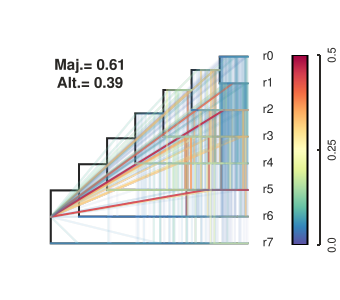

In [30]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.61</b><br/><b>Alt.= 0.39</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-variable-ne-1e3-imb.svg")
c

In [31]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.05814311557788944 0.0890315064935065


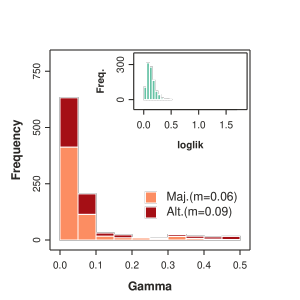

In [32]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.06)", bars.markers[0]),
    ("Alt.(m=0.09)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_Ne_1000.snaq_net1_genealogies_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-hist-gamma-variable-ne-1e3-imb.svg")
c

#### Net 1 gene trees

In [33]:
a, b, c = parse_networks_tsv(superset_imb_Ne_1000.snaq_net1_raxtrees, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_ne)
f

0.42827868852459017

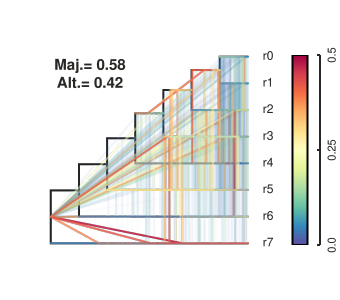

In [34]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.58</b><br/><b>Alt.= 0.42</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-variable-ne-1e3-imb.svg")
c

In [35]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.07127577060931899 0.11026131578947368


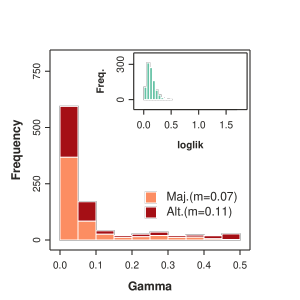

In [36]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.07)", bars.markers[0]),
    ("Alt.(m=0.11)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_Ne_1000.snaq_net1_raxtrees_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-hist-gamma-variable-ne-1e3-imb.svg")
c

### Imb Ne 100000

#### Net 1 genealogies

In [37]:
a, b, c = parse_networks_tsv(superset_imb_Ne_100000.snaq_net1_genealogies, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_ne)
f

0.3809024134312697

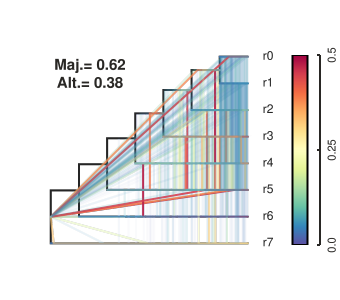

In [38]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.62</b><br/><b>Alt.= 0.38</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-variable-ne-1e5-imb.svg")
c

In [39]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.05955022033898305 0.0801060606060606


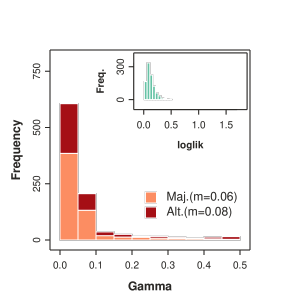

In [40]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.06)", bars.markers[0]),
    ("Alt.(m=0.08)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_Ne_100000.snaq_net1_genealogies_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-hist-gamma-variable-ne-1e5-imb.svg")
c

#### Net 1 gene trees

In [41]:
a, b, c = parse_networks_tsv(superset_imb_Ne_100000.snaq_net1_raxtrees, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_ne)
f

0.018575851393188854

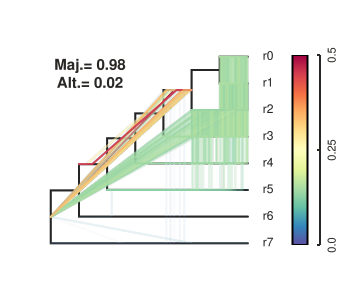

In [42]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.98</b><br/><b>Alt.= 0.02</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-variable-ne-1e5-imb.svg")
c

In [43]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.1451882229232387 0.16119999999999998


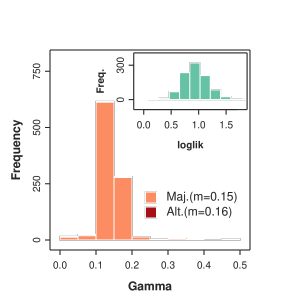

In [44]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.15)", bars.markers[0]),
    ("Alt.(m=0.16)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_Ne_100000.snaq_net1_raxtrees_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-hist-gamma-variable-ne-1e5-imb.svg")
c

### Imb gt 1000

#### Net 1 genealogies

In [45]:
a, b, c = parse_networks_tsv(superset_imb_gt_1000.snaq_net1_genealogies, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_gt)
f

0.37735849056603776

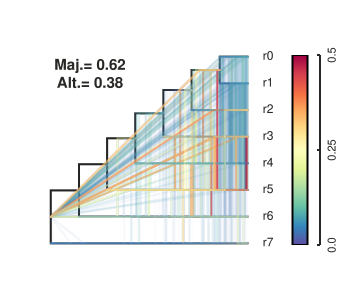

In [46]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.62</b><br/><b>Alt.= 0.38</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-variable-gt-1e3-imb.svg")
c

In [47]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.05878220538720538 0.08250002777777778


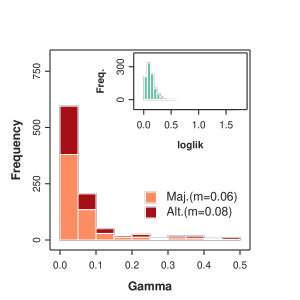

In [48]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.06)", bars.markers[0]),
    ("Alt.(m=0.08)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_gt_1000.snaq_net1_genealogies_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-hist-gamma-variable-gt-1e3-imb.svg")
c

#### Net 1 gene trees

In [49]:
a, b, c = parse_networks_tsv(superset_imb_gt_1000.snaq_net1_raxtrees, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_gt)
f

0.3539915966386555

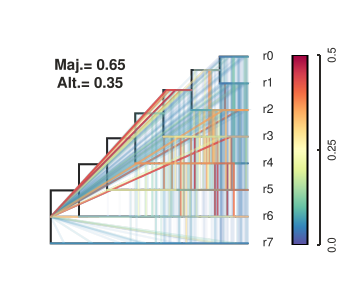

In [50]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.65</b><br/><b>Alt.= 0.35</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-variable-gt-1e3-imb.svg")
c

In [51]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.08129743089430894 0.12411338278931752


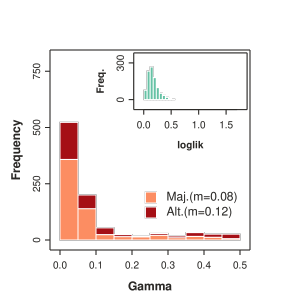

In [52]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.08)", bars.markers[0]),
    ("Alt.(m=0.12)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_gt_1000.snaq_net1_raxtrees_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-hist-gamma-variable-gt-1e3-imb.svg")
c

### Imb gt 100000

#### Net 1 genealogies

In [53]:
a, b, c = parse_networks_tsv(superset_imb_gt_100000.snaq_net1_genealogies, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_gt)
f

0.37538461538461537

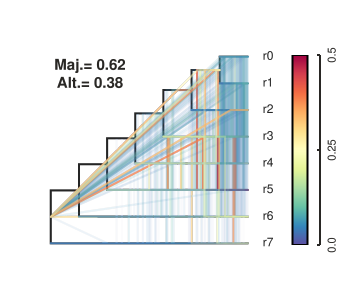

In [54]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.62</b><br/><b>Alt.= 0.38</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-variable-gt-1e5-imb.svg")
c

In [55]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.053733087027914614 0.09429453551912569


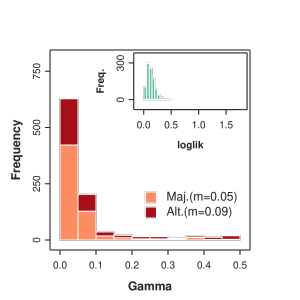

In [56]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.05)", bars.markers[0]),
    ("Alt.(m=0.09)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_gt_100000.snaq_net1_genealogies_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genealogies-superset1000-hist-gamma-variable-gt-1e5-imb.svg")
c

#### Net 1 gene trees

In [57]:
a, b, c = parse_networks_tsv(superset_imb_gt_100000.snaq_net1_raxtrees, cmap_snaq)
d, e, f = count_alt_topology_prop(b, imbtree_gt)
f

0.5098039215686274

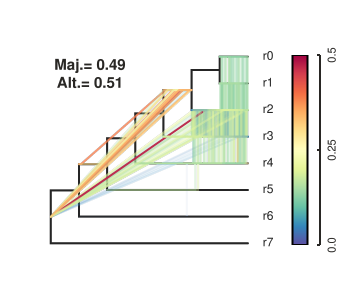

In [58]:
# draw all edges on major networks
c, a, m = IMBTREE.draw(height=300, width=340, admixture_edges=d.plot_admix.to_list(),
                      fixed_order = NAME_ORDER);
# add colorbar
numberline = c.numberline(300, 245, 300, 55, min=0, max=0.5)
numberline.colormap(cmap_snaq, width=15, style={"stroke-width": 2, "stroke": "black"})
numberline.axis.ticks.locator = toyplot.locator.Explicit(locations=[0.0, 0.25, 0.50], labels=[0.0, 0.25, 0.50])
numberline.axis.ticks.show = True
numberline.axis.ticks.near = False
numberline.axis.ticks.style["stroke-width"] = 2
numberline.axis.spine.style["stroke-width"] = 2
numberline.axis.ticks.labels.style["font-size"] = 11
# add text major vs. alternative network topology
c.text(90,75,
    "<b>Maj.= 0.49</b><br/><b>Alt.= 0.51</b>",
    style={"font-size":"15px"},
);
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-variable-gt-1e5-imb.svg")
c

In [59]:
# compute means
hist_major_mean = np.mean(d.gamma[d["gamma"] != 0].values)
hist_minor_mean = np.mean(e.gamma[e["gamma"] != 0].values)
print(hist_major_mean, hist_minor_mean)

0.13382757894736844 0.11147874493927126


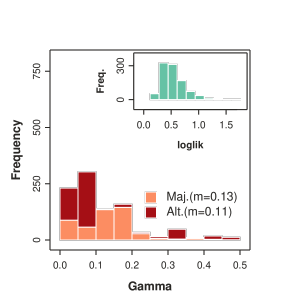

In [60]:
# stacked gamma histogram
hist_major = np.histogram(d.gamma[d["gamma"] != 0].values, range=(0, 0.5), bins=10)
hist_minor = np.histogram(e.gamma[e["gamma"] != 0].values, range=(0, 0.5), bins=10)
major_minor_stack_counts = np.column_stack((hist_major[0], hist_minor[0]))

c = toyplot.Canvas(width=300, height=300)
a = c.cartesian()
bars = a.bars((major_minor_stack_counts), 
              along="x",
              color=[colors_hist[1], colors2_hist[1]])
a.x.label.text = "Gamma"
a.y.label.text = "Frequency"
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
a.x.ticks.locator = toyplot.locator.Explicit(locations=[-0.5,1.5,3.5,5.5,7.5,9.5], labels=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5])
c.style["stroke.width"]=8
a.y.domain.max=800
c.legend([
    ("Maj.(m=0.13)", bars.markers[0]),
    ("Alt.(m=0.11)", bars.markers[1]),
    ],
    bounds=(160, 163, 190, 220),
    );

# loglik
loglik = np.array(superset_imb_gt_100000.snaq_net1_raxtrees_loglik_diff)
a2 = c.cartesian(corner=("top-right", "1.4cm", "3cm", "1.5cm"))
a2.bars(np.histogram(loglik))
toytree.utils.set_axes_ticks_external(a2)
toytree.utils.set_axes_box_outline(a2)
a2.y.ticks.locator = toyplot.locator.Explicit(locations=[0, 300], labels=[0, 300])
a2.x.label.text = "loglik"
a2.x.label.style = {"font-size":"10px"}
a2.y.label.text = "Freq."
a2.y.label.style = {"font-size":"10px"}
a2.x.domain.max = 1.7


# render
toyplot.svg.render(c, "./nb13_output/plot-net1genetrees-superset1000-hist-gamma-variable-gt-1e5-imb.svg")
c

## Gamma vs. loglik correlation plot

In [61]:
# color palette
colors = toyplot.color.brewer.palette("Set2")
colors

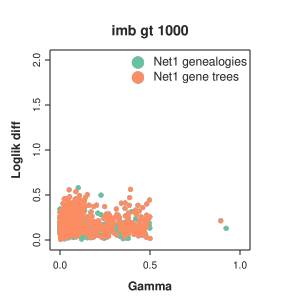

In [62]:
# imb gt 1000
a1, b1, c1 = parse_networks_tsv(superset_imb_gt_1000.snaq_net1_genealogies, cmap_snaq)
a2, b2, c2 = parse_networks_tsv(superset_imb_gt_1000.snaq_net1_raxtrees, cmap_snaq)
c = toyplot.Canvas(width=300, height=300)
a = c.cartesian(label="imb gt 1000", xlabel="Gamma", ylabel="Loglik diff")
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
m1 = a.scatterplot(a1.gamma, superset_imb_gt_1000.snaq_net1_genealogies_loglik_diff)
m2 = a.scatterplot(a2.gamma, superset_imb_gt_1000.snaq_net1_raxtrees_loglik_diff)
a.y.domain.max = 2.0
a.x.domain.max = 1.0
c.legend([
    ("Net1 genealogies", m1.markers[0]),
    ("Net1 gene trees", m2.markers[0]),
    ],
    bounds=(147, 150, 55, 85),
    );
toyplot.svg.render(c, "./nb13_output/plot-net1all-superset1000-corr-gamma-loglik-variable-gt-1e3-imb.svg")
c

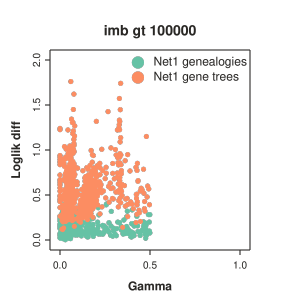

In [63]:
# imb gt 100000
a1, b1, c1 = parse_networks_tsv(superset_imb_gt_100000.snaq_net1_genealogies, cmap_snaq)
a2, b2, c2 = parse_networks_tsv(superset_imb_gt_100000.snaq_net1_raxtrees, cmap_snaq)
c = toyplot.Canvas(width=300, height=300)
a = c.cartesian(label="imb gt 100000", xlabel="Gamma", ylabel="Loglik diff")
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
m1 = a.scatterplot(a1.gamma, superset_imb_gt_100000.snaq_net1_genealogies_loglik_diff)
m2 = a.scatterplot(a2.gamma, superset_imb_gt_100000.snaq_net1_raxtrees_loglik_diff)
a.y.domain.max = 2.0
a.x.domain.max = 1.0
c.legend([
    ("Net1 genealogies", m1.markers[0]),
    ("Net1 gene trees", m2.markers[0]),
    ],
    bounds=(147, 150, 55, 85),
    );
toyplot.svg.render(c, "./nb13_output/plot-net1all-superset1000-corr-gamma-loglik-variable-gt-1e5-imb.svg")
c

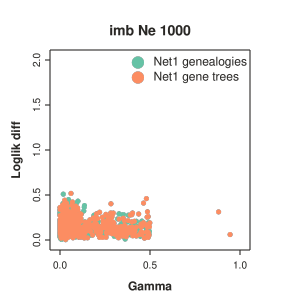

In [65]:
# imb Ne 1000
a1, b1, c1 = parse_networks_tsv(superset_imb_Ne_1000.snaq_net1_genealogies, cmap_snaq)
a2, b2, c2 = parse_networks_tsv(superset_imb_Ne_1000.snaq_net1_raxtrees, cmap_snaq)
c = toyplot.Canvas(width=300, height=300)
a = c.cartesian(label="imb Ne 1000", xlabel="Gamma", ylabel="Loglik diff")
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
m1 = a.scatterplot(a1.gamma, superset_imb_Ne_1000.snaq_net1_genealogies_loglik_diff)
m2 = a.scatterplot(a2.gamma, superset_imb_Ne_1000.snaq_net1_raxtrees_loglik_diff)
a.y.domain.max = 2.0
a.x.domain.max = 1.0
c.legend([
    ("Net1 genealogies", m1.markers[0]),
    ("Net1 gene trees", m2.markers[0]),
    ],
    bounds=(147, 150, 55, 85),
    );
toyplot.svg.render(c, "./nb13_output/plot-net1all-superset1000-corr-gamma-loglik-variable-ne-1e3-imb.svg")
c

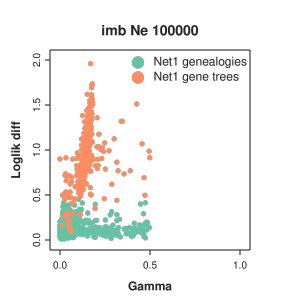

In [66]:
# imb Ne 100000
a1, b1, c1 = parse_networks_tsv(superset_imb_Ne_100000.snaq_net1_genealogies, cmap_snaq)
a2, b2, c2 = parse_networks_tsv(superset_imb_Ne_100000.snaq_net1_raxtrees, cmap_snaq)
c = toyplot.Canvas(width=300, height=300)
a = c.cartesian(label="imb Ne 100000", xlabel="Gamma", ylabel="Loglik diff")
toytree.utils.set_axes_ticks_external(a)
toytree.utils.set_axes_box_outline(a)
mark1 = a.scatterplot(a1.gamma, superset_imb_Ne_100000.snaq_net1_genealogies_loglik_diff)
mark2 = a.scatterplot(a2.gamma, superset_imb_Ne_100000.snaq_net1_raxtrees_loglik_diff)
a.y.domain.max = 2.0
a.x.domain.max = 1.0
c.legend([
    ("Net1 genealogies", m1.markers[0]),
    ("Net1 gene trees", m2.markers[0]),
    ],
    bounds=(147, 150, 55, 85),
    );
toyplot.svg.render(c, "./nb13_output/plot-net1all-superset1000-corr-gamma-loglik-variable-ne-1e5-imb.svg")
c

## Astral tree error

In [67]:
# color palette
colors = toyplot.color.brewer.palette("Set2")
colors

In [68]:
def concat_dist(concat_trees, true_sptree):
    rfs = []
    for concat_tree in concat_trees:
        c_tree = toytree.tree(concat_tree)
        rf = toytree.distance.get_treedist_rf(c_tree, true_sptree)
        rfs.append(rf)
    return rfs

In [69]:
def check_error_rate(input_col):
    errors = []
    for dist in input_col:
        if(dist == 0):
                errors.append(0)
        else:
            errors.append(1)
    error_rate = sum(errors)/len(errors)
    
    return error_rate

In [75]:
rf_imb_gt_1000 = concat_dist(superset_imb_gt_1000.concat_tree_raxml, imbtree_gt)
rf_imb_gt_100000 = concat_dist(superset_imb_gt_100000.concat_tree_raxml, imbtree_gt)
rf_imb_Ne_1000 = concat_dist(superset_imb_Ne_1000.concat_tree_raxml, imbtree_ne)
rf_imb_Ne_100000 = concat_dist(superset_imb_Ne_100000.concat_tree_raxml, imbtree_ne)

error_rate_imb_gt_1000_concat = check_error_rate(rf_imb_gt_1000)
error_rate_imb_gt_100000_concat = check_error_rate(rf_imb_gt_100000)
error_rate_imb_ne_1000_concat = check_error_rate(rf_imb_Ne_1000)
error_rate_imb_ne_100000_concat = check_error_rate(rf_imb_Ne_100000)

In [76]:
error_rate_imb_gt_1000_genealogies = check_error_rate(superset_imb_gt_1000.dist_astral_tree_genealogies)
error_rate_imb_gt_100000_genealogies = check_error_rate(superset_imb_gt_100000.dist_astral_tree_genealogies)
error_rate_imb_ne_1000_genealogies = check_error_rate(superset_imb_Ne_1000.dist_astral_tree_genealogies)
error_rate_imb_ne_100000_genealogies = check_error_rate(superset_imb_Ne_100000.dist_astral_tree_genealogies)

error_rate_imb_gt_1000_raxml_gene_trees = check_error_rate(superset_imb_gt_1000.dist_astral_tree_raxtrees)
error_rate_imb_gt_100000_raxml_gene_trees = check_error_rate(superset_imb_gt_100000.dist_astral_tree_raxtrees)
error_rate_imb_ne_1000_raxml_gene_trees = check_error_rate(superset_imb_Ne_1000.dist_astral_tree_raxtrees)
error_rate_imb_ne_100000_raxml_gene_trees = check_error_rate(superset_imb_Ne_100000.dist_astral_tree_raxtrees)

In [77]:
data_dist = np.array([error_rate_imb_ne_1000_concat, error_rate_imb_gt_1000_concat,
                      error_rate_imb_ne_100000_concat, error_rate_imb_gt_100000_concat,
                      error_rate_imb_ne_1000_genealogies, error_rate_imb_gt_1000_genealogies, 
                      error_rate_imb_ne_1000_raxml_gene_trees, error_rate_imb_gt_1000_raxml_gene_trees, 
                      error_rate_imb_ne_100000_genealogies, error_rate_imb_gt_100000_genealogies, 
                      error_rate_imb_ne_100000_raxml_gene_trees, error_rate_imb_gt_100000_raxml_gene_trees])
data_dist

array([1.        , 1.        , 1.        , 1.        , 0.32532533,
       0.28762887, 0.39239239, 0.34948454, 0.3371134 , 0.31552419,
       0.0443299 , 0.51814516])

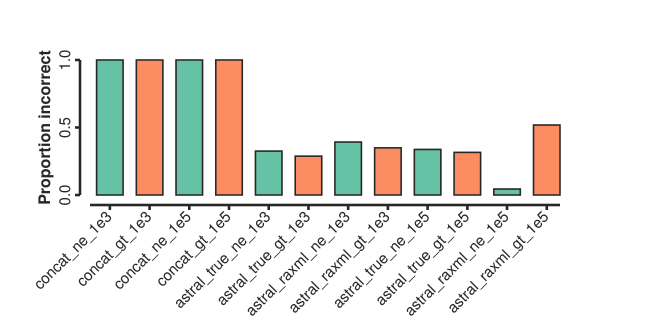

In [78]:
canvas = toyplot.Canvas(width=650, height=325)
axes = canvas.cartesian(bounds=(80, -80, 50, -120))
axes.x.ticks.locator = toyplot.locator.Explicit(np.arange(data_dist.size) + 0.5, )
axes.x.spine.style["stroke-width"] = 2.5
axes.x.ticks.style["stroke-width"] = 2.5
axes.x.ticks.labels.style["font-size"] = 15
axes.x.label.style["font-size"] = 16
axes.x.domain.min = 0
axes.x.ticks.locator = toyplot.locator.Explicit(
    locations=[0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5],
    labels=["concat_ne_1e3", "concat_gt_1e3",
            "concat_ne_1e5", "concat_gt_1e5",
            "astral_true_ne_1e3", "astral_true_gt_1e3", 
            "astral_raxml_ne_1e3", "astral_raxml_gt_1e3", 
            "astral_true_ne_1e5", "astral_true_gt_1e5", 
            "astral_raxml_ne_1e5", "astral_raxml_gt_1e5"])
axes.x.ticks.labels.angle = 45

axes.y.label.text = "Proportion incorrect"
axes.y.spine.style["stroke-width"] = 2.5
axes.y.ticks.style["stroke-width"] = 2.5
axes.y.ticks.labels.style["font-size"] = 15
axes.y.ticks.labels.style["font-size"] = 15
axes.y.label.style["font-size"] = 16
axes.y.domain.max = 1.0

starts = np.arange(data_dist.size) + 1/6
mark = axes.bars(
    starts, 
    starts + 4/6,
    data_dist,
    style={"stroke": "#262626", 
           "stroke-width": 1.5},
    color=[colors[0], colors[1], colors[0], colors[1], colors[0], colors[1], colors[0], colors[1], colors[0], colors[1], colors[0], colors[1]]
)

toytree.utils.set_axes_ticks_external(axes);
toyplot.svg.render(canvas, "./nb13_output/plot-astral-error-rate-rf.svg")
canvas